## NYC Taxi Analysis

## Introduction

- NYC Taxi & Limousine Commission offers public data about all trips completed by taxis in New York City
- The entire dataset is quite big as it has rides from starting from 2009 till present day - more than a billion trips and counting
- For my analysis, I focused on one month (2015-06) of data

## Research Question

- I sought in my analysis if there are areas in NYC where people travelling from pay more tips while keeping in mind below:
    * Such areas may not exist at all
    * Data only has latitude, longitude of pickup & drop points, so how should an aread be defined?
    * How much is 'more' tip?
    * What are some extreme cases
    * May need to consider more dimenisons like time, no. of passengers etc.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime

## Load Data

In [2]:
data = pd.read_csv('Downloads/yellow_tripdata_2015-06.csv')

In [3]:
data.shape

(12324935, 19)

In [4]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [5]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [8]:
data['pickup_day'] = data['tpep_pickup_datetime'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).day)

In [10]:
data.pickup_day.value_counts().sort_index()

1     400833
2     419994
3     425776
4     444543
5     451185
6     449804
7     402188
8     391087
9     409188
10    424356
11    439869
12    443026
13    428004
14    382037
15    374858
16    400518
17    425743
18    429386
19    436303
20    413866
21    366158
22    374849
23    406139
24    411370
25    419739
26    425774
27    445861
28    348433
29    359808
30    374240
Name: pickup_day, dtype: int64

## Data Down-Sampling

As I dug into the data, I relaized quickly that the scale of data (even for a month) is indeed 'big data' for python and single machine computations. The file for June, 2015 is about 2 GB and contains more than 12 Million rows. Even simple operations & data transformations were quite slow on this scale of data on my 8 GB RAM. So I needed to scale things down.

I had originally wanted to examine data for a weekly cycle to be able to see weekend vs. weekday effect. Ultimately, though, I found it necessary to constrain my analysis to just a single day. I quickly examined distribution of trips acorss entire month and observed it was an average 400K trips every day. So I  selected 3 June, 2015 randomly for further analysis.

Though we do loose information, but also as we are mainly interseted to see the effect of area on tip amount, it should be okay to down-sample to 1 day. 

In [13]:
data = data.loc[data.pickup_day == 3]

In [14]:
data.shape

(425776, 20)

In [32]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day,pickup_hour
1145196,2,2015-06-03 00:00:00,2015-06-03 00:00:00,3,1.51,-73.991966,40.725712,1,N,-74.003143,...,1,9.0,0.0,0.5,1.47,0.00,0.3,11.27,3,0
1145197,1,2015-06-03 00:00:01,2015-06-03 00:00:17,2,0.00,0.000000,0.000000,2,N,0.000000,...,1,52.0,0.0,0.5,6.00,5.54,0.3,64.34,3,0
1145198,2,2015-06-03 00:00:01,2015-06-03 00:06:43,2,1.82,-73.953682,40.775360,1,N,-73.979843,...,1,7.5,0.5,0.5,1.00,0.00,0.3,9.80,3,0
1145199,2,2015-06-03 00:00:02,2015-06-03 00:03:37,1,0.79,-73.971230,40.755219,1,N,-73.979050,...,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,3,0
1145200,2,2015-06-03 00:00:03,2015-06-03 00:18:00,1,5.28,-73.994865,40.760593,1,N,-73.934364,...,1,18.0,0.5,0.5,3.86,0.00,0.3,23.16,3,0


In [16]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day
count,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.000000,425776.0
mean,1.523155,1.647989,2.926466,-72.909211,40.165476,1.037264,-72.936029,40.181498,1.358815,13.292383,0.358525,0.497900,1.823521,0.320647,0.299746,16.592899,3.0
std,0.499464,1.324534,3.690656,8.809160,4.853057,0.503443,8.700040,4.840542,0.494082,10.951677,0.388530,0.034783,2.576556,1.686782,0.011692,13.500400,0.0
min,1.000000,0.000000,0.000000,-87.860580,0.000000,1.000000,-84.839378,0.000000,1.000000,-91.000000,-1.000000,-0.500000,-1.000000,0.000000,-0.300000,-91.300000,3.0
25%,1.000000,1.000000,1.000000,-73.991524,40.738007,1.000000,-73.990967,40.736649,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,3.0
50%,2.000000,1.000000,1.700000,-73.980721,40.755169,1.000000,-73.979042,40.755070,1.000000,10.000000,0.500000,0.500000,1.320000,0.000000,0.300000,12.360000,3.0
75%,2.000000,2.000000,3.100000,-73.965805,40.768978,1.000000,-73.962601,40.769699,2.000000,15.500000,0.500000,0.500000,2.460000,0.000000,0.300000,18.500000,3.0
max,2.000000,9.000000,580.200000,0.000000,52.170792,99.000000,0.000000,480.250000,5.000000,940.000000,1.500000,0.500000,200.000000,595.630000,0.300000,980.300000,3.0


## Data Cleaning

A simple data.describe() showed me that though there are no missing values, but there are some incorrect values that needs to be dropped or corrected somehow. As they were only handful, I decided to drop them indeed.

- 0 latitude & longitude for pickup and/or dropoff
- 0 passenger count
- 0 trip distance
- 0 or -ve fare amount

In [77]:
# drop rows with 0 values for pickup or drop off lat/long
data = data[(data.pickup_latitude != 0) & 
            (data.pickup_longitude != 0) & 
            (data.dropoff_latitude !=0) & 
            (data.dropoff_longitude !=0)]

# drop rows with 0 passenger count

data = data[data.passenger_count >0]

# drop rows with 0 trip distance 

data = data[data.trip_distance >0]

# drop rows with either 0 or -ve fare amount

data = data[data.fare_amount >0]

In [78]:
data.shape

(417223, 22)

In [80]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day,pickup_hour
count,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.000000,417223.0,417223.000000
mean,1.527766,1.653003,2.944773,-73.973618,40.751854,1.029751,-73.973844,40.753254,1.355393,13.266274,0.359787,0.498802,1.820428,0.319515,0.299981,16.564970,3.0,13.980933
std,0.499229,1.329507,3.696218,0.049039,0.043311,0.344791,0.042338,0.684222,0.489941,10.644777,0.388362,0.024449,2.530949,1.687780,0.002368,13.206919,0.0,6.178966
min,1.000000,1.000000,0.010000,-87.860580,27.869371,1.000000,-84.839378,4.111312,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,3.0,0.000000
25%,1.000000,1.000000,1.010000,-73.991653,40.738956,1.000000,-73.991104,40.737778,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,3.0,9.000000
50%,2.000000,1.000000,1.700000,-73.981049,40.755581,1.000000,-73.979332,40.755466,1.000000,10.000000,0.500000,0.500000,1.350000,0.000000,0.300000,12.360000,3.0,14.000000
75%,2.000000,2.000000,3.100000,-73.966743,40.769184,1.000000,-73.963646,40.770020,2.000000,15.500000,0.500000,0.500000,2.460000,0.000000,0.300000,18.500000,3.0,19.000000
max,2.000000,7.000000,580.200000,-73.422028,52.170792,99.000000,-69.196922,480.250000,5.000000,555.500000,1.500000,0.500000,200.000000,595.630000,0.300000,666.960000,3.0,23.000000


## Feature Engineering

Before jumping into analysis, I decided to engineer some features that made intuitive sense to have effect on tip amount

- Hour of pickup and time segment
- trip time
- great circle distance between pickup and dropoff based on lat, long information. This is particularly interesting as I can imagine that people would tip less if lat, long distance is much smaller than trip distance, as it probably means driver took a longer route

## Hour and time segment

In [ ]:
hour = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour

In [82]:
data['pickup_hour'] = data['tpep_pickup_datetime'].map(hour)

In [83]:
# sleep: 12-5, 6-9: breakfast, 10-14: lunch, 14-17: dinner prep, 17-21: dinner, 21-23: deserts!
times_of_day = [-1,5,9,14,17,21,23]
labels = ['sleep','breakfast','lunch','dinner prep','dinner','desserts']

In [84]:
data['hour_seg'] = pd.cut(data.pickup_hour,times_of_day,labels=labels)

In [85]:
data.groupby(['hour_seg','pickup_hour']).VendorID.count()

hour_seg     pickup_hour
sleep        0              12397
             1               6994
             2               4470
             3               2731
             4               2638
             5               4200
breakfast    6              11412
             7              20655
             8              23901
             9              21793
lunch        10             19444
             11             19850
             12             20251
             13             19653
             14             20430
dinner prep  15             19224
             16             15411
             17             19296
dinner       18             24524
             19             26902
             20             26678
             21             27235
desserts     22             25340
             23             21794
Name: VendorID, dtype: int64

## Trip time

In [120]:
def compute_date_diff(x, y):
    # convert x into date, y into date, compute date diff
    date_x = datetime.strptime(x, "%Y-%m-%d %H:%M:%S" )
    date_y = datetime.strptime(y, "%Y-%m-%d %H:%M:%S" )
    return float((date_y - date_x).seconds)/60

In [127]:
data['trip_time'] = data[['tpep_pickup_datetime','tpep_dropoff_datetime']].apply(lambda x: compute_date_diff(*x),axis=1)

In [128]:
data[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_time']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_time
1145196,2015-06-03 00:00:00,2015-06-03 00:00:00,0.000000
1145198,2015-06-03 00:00:01,2015-06-03 00:06:43,6.700000
1145199,2015-06-03 00:00:02,2015-06-03 00:03:37,3.583333
1145200,2015-06-03 00:00:03,2015-06-03 00:18:00,17.950000
1145201,2015-06-03 00:00:05,2015-06-03 00:18:06,18.016667


In [132]:
# drop rows where trip time is 0

data = data[data.trip_time >0]

In [133]:
data.shape

(417213, 23)

## Great circle distance between pick-up & drop-off based on lat, lang. 

It would be interesting to see how much they differ from trip distance. Can imagine that if trip distance is much higher, people would be less likely to pay any tip

In [137]:
from haversine import haversine

In [ ]:
haversine((),())

In [139]:
data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_distance','trip_time']].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,trip_time
1145198,-73.953682,40.775360,-73.979843,40.783970,1.82,6.700000
1145199,-73.971230,40.755219,-73.979050,40.762749,0.79,3.583333
1145200,-73.994865,40.760593,-73.934364,40.794670,5.28,17.950000
1145201,-73.995049,40.725502,-73.962852,40.772133,4.00,18.016667
1145202,-73.985748,40.759399,-73.983932,40.724739,3.33,18.750000


In [153]:
def compute_distance(x_lat,x_long,y_lat,y_long):
    return haversine((x_lat,x_long),(y_lat,y_long))

In [154]:
data['lat_long_distance'] = data[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(lambda x: compute_distance(*x),axis=1)

In [156]:
data[['lat_long_distance','trip_distance']].head()

,lat_long_distance,trip_distance
1145198,2.401817,1.82
1145199,1.065335,0.79
1145200,6.349012,5.28
1145201,5.851600,4.00
1145202,3.857089,3.33


In [170]:
data.loc[(data.trip_distance - data.lat_long_distance)>10,['lat_long_distance','trip_distance','tip_amount']].head()

,lat_long_distance,trip_distance,tip_amount
1160173,0.000000,11.60,7.36
1160297,0.045527,20.64,0.00
1160301,0.006477,18.40,0.00
1160360,0.000848,18.40,0.00
1160724,0.001425,18.40,17.00


## Defining Neighborhood

I decided to use some publicly available data about coordinates of various neighborhoods & boroughs in New York city. http://catalog.opendata.city/dataset/pediacities-nyc-neighborhoods. The file was available as a json object, which I had to first process to extract required information. There were 266 neigborhoods in 5 boroughs. Again for efficiency, I decided to work with boroughs rather than more granular neighborhoods.

Next I used python 'shapely' library to plot these 5 boroughs as Polygons and applied a function to every pickup & dropoff location to see which of the 5 polygons contain it. Otherwise it was marked as 'Outside NYC". This step took insanely long time. Almost 2 hours.

In [176]:
import json

In [221]:
ny_neigh = pd.read_json('ny-neigh.txt')

In [222]:
ny_neigh.shape

(310, 2)

In [241]:
ny_neigh.features[0]

{u'geometry': {u'coordinates': [[[-73.84859700000018, 40.871670000000115],
    [-73.84582253683678, 40.870239076236174],
    [-73.85455918463374, 40.85995383576425],
    [-73.85466543306826, 40.859585694988056],
    [-73.85638870335896, 40.85759363530448],
    [-73.86888180915341, 40.857223150158326],
    [-73.86831755272824, 40.85786206225831],
    [-73.86955371467232, 40.85778409560018],
    [-73.87102485762065, 40.857309948816905],
    [-73.87048054998716, 40.865413584098484],
    [-73.87055489856489, 40.86970279858986],
    [-73.86721594442561, 40.86968966363671],
    [-73.85745, 40.86953300000018],
    [-73.85555000000011, 40.871813000000145],
    [-73.85359796757658, 40.8732883686742],
    [-73.84859700000018, 40.871670000000115]]],
  u'type': u'Polygon'},
 u'properties': {u'@id': u'http://nyc.pediacities.com/Resource/Neighborhood/Allerton',
  u'borough': u'Bronx',
  u'boroughCode': u'2',
  u'neighborhood': u'Allerton'},
 u'type': u'Feature'}

In [244]:
ny_neigh['neighborhood'] = ny_neigh.features.map(lambda x: x['properties']['neighborhood'])
ny_neigh['borough'] = ny_neigh.features.map(lambda x: x['properties']['borough'])
ny_neigh['boroughCode'] = ny_neigh.features.map(lambda x: x['properties']['boroughCode'])
ny_neigh['coordinates'] = ny_neigh.features.map(lambda x: x['geometry']['coordinates'][0])

In [245]:
ny_neigh.head()

,features,type,neighborhood,borough,boroughCode,coordinates
0,"{u'geometry': {u'type': u'Polygon', u'coordina...",FeatureCollection,Allerton,Bronx,2,"[[-73.848597, 40.87167], [-73.8458225368, 40.8..."
1,"{u'geometry': {u'type': u'Polygon', u'coordina...",FeatureCollection,Alley Pond Park,Queens,4,"[[-73.743332682, 40.7388830993], [-73.74371398..."
2,"{u'geometry': {u'type': u'Polygon', u'coordina...",FeatureCollection,Arden Heights,Staten Island,5,"[[-74.169827, 40.561078], [-74.1698225726, 40...."
3,"{u'geometry': {u'type': u'Polygon', u'coordina...",FeatureCollection,Arlington,Staten Island,5,"[[-74.1597481587, 40.6414165258], [-74.1599787..."
4,"{u'geometry': {u'type': u'Polygon', u'coordina...",FeatureCollection,Arrochar,Staten Island,5,"[[-74.0607798935, 40.5931880047], [-74.0607917..."


In [262]:
ny_neigh.borough.value_counts()

Bronx            75
Queens           73
Brooklyn         71
Staten Island    54
Manhattan        37
Name: borough, dtype: int64

In [289]:
ny_borough = ny_neigh[['borough','coordinates']].groupby('borough').aggregate(lambda x: list(x))

In [299]:
ny_borough['coordinates'] = ny_borough.coordinates.apply(lambda x: [item for y in x for item in y])

In [300]:
ny_borough.head()

,coordinates
borough,
Bronx,"[[-73.848597, 40.87167], [-73.8458225368, 40.8..."
Brooklyn,"[[-73.99381, 40.60195], [-73.9996196272, 40.59..."
Manhattan,"[[-74.013754, 40.71369], [-74.014262, 40.71092..."
Queens,"[[-73.743332682, 40.7388830993], [-73.74371398..."
Staten Island,"[[-74.169827, 40.561078], [-74.1698225726, 40...."


In [304]:
ny_borough.reset_index(inplace=True)

In [305]:
ny_borough.head()

,borough,coordinates
0,Bronx,"[[-73.848597, 40.87167], [-73.8458225368, 40.8..."
1,Brooklyn,"[[-73.99381, 40.60195], [-73.9996196272, 40.59..."
2,Manhattan,"[[-74.013754, 40.71369], [-74.014262, 40.71092..."
3,Queens,"[[-73.743332682, 40.7388830993], [-73.74371398..."
4,Staten Island,"[[-74.169827, 40.561078], [-74.1698225726, 40...."


In [247]:
from shapely.geometry import Polygon,Point

In [318]:
Bronx = Polygon(ny_borough.loc[ny_borough.borough == 'Bronx','coordinates'].values.tolist()[0])
Brooklyn = Polygon(ny_borough.loc[ny_borough.borough == 'Brooklyn','coordinates'].values.tolist()[0])
Manhattan = Polygon(ny_borough.loc[ny_borough.borough == 'Manhattan','coordinates'].values.tolist()[0])
Queens = Polygon(ny_borough.loc[ny_borough.borough == 'Queens','coordinates'].values.tolist()[0])
Staten_Island = Polygon(ny_borough.loc[ny_borough.borough == 'Staten Island','coordinates'].values.tolist()[0])

In [285]:
Bronx = Polygon(ny_borough.coordinates[ny_borough.borough == 'Bronx'])

Self-intersection at or near point -74.072694826648302 40.615748435017252


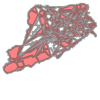

In [324]:
Staten_Island

In [325]:
def getborough(lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)

    # the contains function does exactly what you want
    if Bronx.contains(point):
        return "Bronx"
    elif Brooklyn.contains(point):
        return "Brooklyn"
    elif Manhattan.contains(point):
        return "Manhattan"
    elif Queens.contains(point):
        return "Queens"
    elif Staten_Island.contains(point):
        return "Staten Island"
    else:
        return "Outside NYC"
        

In [326]:
data.columns

Index([u'VendorID', u'tpep_pickup_datetime', u'tpep_dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'RateCodeID', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'improvement_surcharge', u'total_amount', u'pickup_day',
       u'pickup_hour', u'hour_seg', u'trip_time', u'lat_long_distance'],
      dtype='object')

In [328]:
data['pickup_borough'] = data[['pickup_longitude','pickup_latitude']].apply(lambda x: getborough(*x),axis=1)

In [329]:
data.pickup_borough.value_counts()

Outside NYC      205408
Manhattan        193501
Queens            14799
Brooklyn           3303
Bronx               201
Staten Island         1
Name: pickup_borough, dtype: int64

In [330]:
data['dropoff_borough'] = data[['dropoff_longitude','dropoff_latitude']].apply(lambda x: getborough(*x),axis=1)

In [331]:
data.dropoff_borough.value_counts()

Outside NYC      201303
Manhattan        190472
Queens            12260
Brooklyn          11670
Bronx              1455
Staten Island        53
Name: dropoff_borough, dtype: int64

## Tip Amount

In [342]:
data['tip_paid'] = (data.tip_amount >0).astype(int)

In [343]:
data[['tip_paid','tip_amount']].head()

,tip_paid,tip_amount
1145198,1,1.00
1145199,0,0.00
1145200,1,3.86
1145201,0,0.00
1145202,0,0.00


## <font color='blue'>More than half trips during the day, paid at least some tip to drivers - 62% precisely

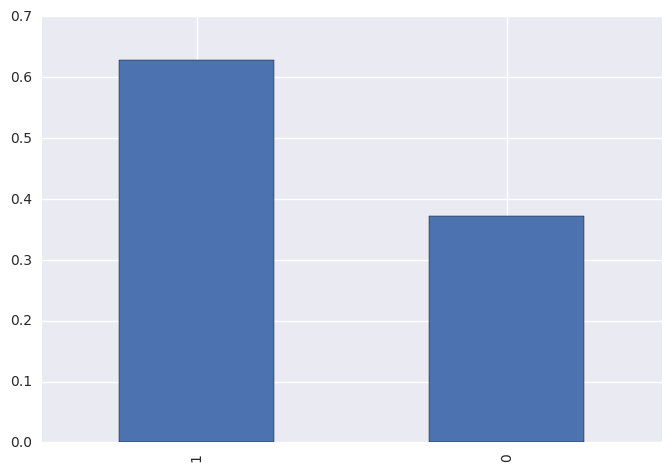

In [397]:
data.tip_paid.value_counts(normalize=True).plot(kind='bar')

## <font color='blue'> Tip % (of other cost) probably makes more sense than absolute tip amount - for further analysis

In [380]:
data['tip_percent'] = data.tip_amount/(data.total_amount - data.tip_amount)

In [399]:
(data.tip_percent>1).sum()

196

In [398]:
data.loc[data.tip_percent>1,['tip_paid','tip_amount','tip_percent','fare_amount','total_amount']].head()

,tip_paid,tip_amount,tip_percent,fare_amount,total_amount
1160766,1,22.0,1.111111,18.5,41.8
1163837,1,21.0,1.640625,11.5,33.8
1181713,1,10.0,1.075269,8.0,19.3
1182098,1,6.3,1.188679,4.0,11.6
1183191,1,15.0,1.086957,12.5,28.8


## <font color='blue'>196 cases where tip % is more than 100%; these are likely data issues; best to remove to avoid weird conclusion

In [403]:
data = data[data.tip_percent<=1]

In [404]:
data.shape

(417017, 28)

## <font color='blue'> Distribution of tip %

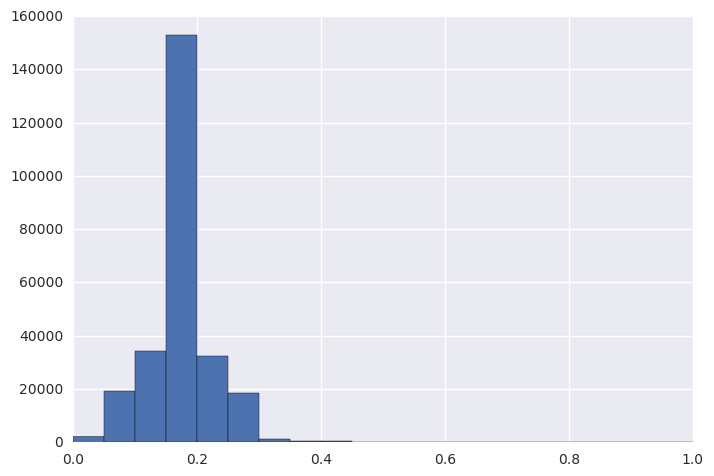

In [411]:
data.tip_percent[data.tip_percent>0].hist(bins=20)

## Based on distribution, makese sense to define 5 segments
* NA         - 0%
* Very Low   - 0-5%
* Low        - 5-10%
* Medium     - 10-20%
* High       - 20-30%
* Very High  - 30-100%

In [449]:
tip_bins = [-1,0,0.05,0.1,0.2,0.3,1]
tip_labels = ['00-na','01-very low','02-low','03-medium','04-high','05-very high']

In [450]:
data['tip_segment'] = pd.cut(data.tip_percent,tip_bins, labels=tip_labels)

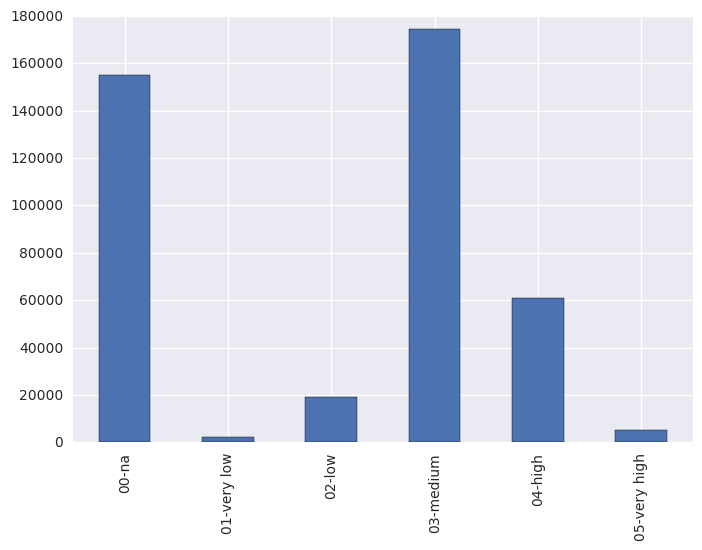

In [454]:
data.tip_segment.value_counts().sort_index().plot(kind='bar')

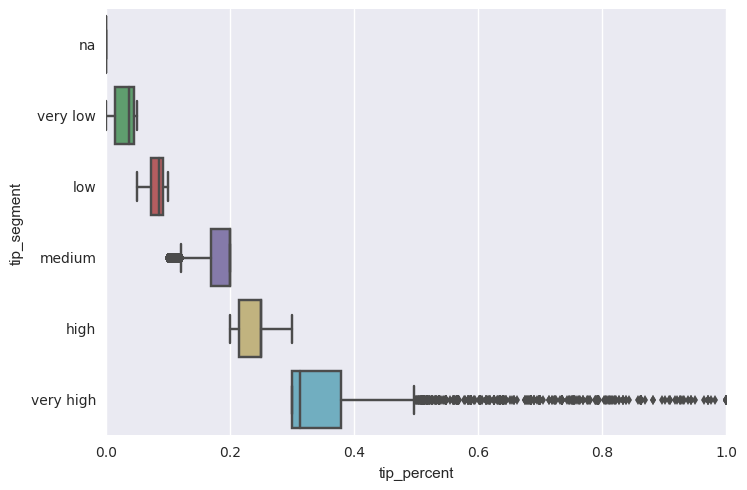

In [445]:
sns.boxplot(x=data.tip_percent,y=data.tip_segment)

## Bivariate analysis of tip with neighborhood & other features

* <font color='blue'> People who get picked or dropped off at Bronx, seem to pay less tip; understandable as Bronx is a poorer area
* <font color='blue'> Staten Island pickup & drop off tip their drivers at a substantially higher rate
* <font color='blue'> Rest seems to behave similarly and tip at a rate of 12% more or less





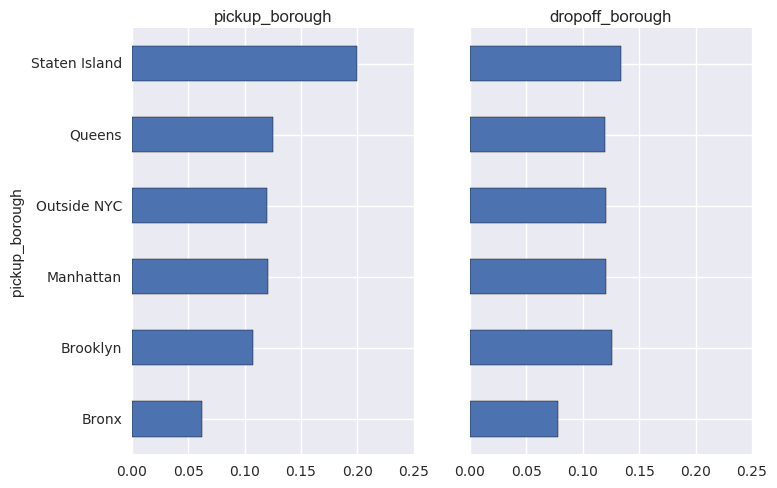

In [524]:
fig, axs = plt.subplots(1,2,sharey='all',sharex='all')

data.groupby('pickup_borough').tip_percent.mean().plot(kind='barh',ax=axs[0],title='pickup_borough')
data.groupby('dropoff_borough').tip_percent.mean().plot(kind='barh',ax=axs[1],title='dropoff_borough')

## <font color='blue'>As we are interested to see effect of area on high tip, lets plot what % of tips of each of the boroughs are either high or very high

* similar conclusion as previous graph, Staten Island has most high tippers and Bronx least. Except that Queens also come across as higher vs. other 3 boroughs in terms of tips

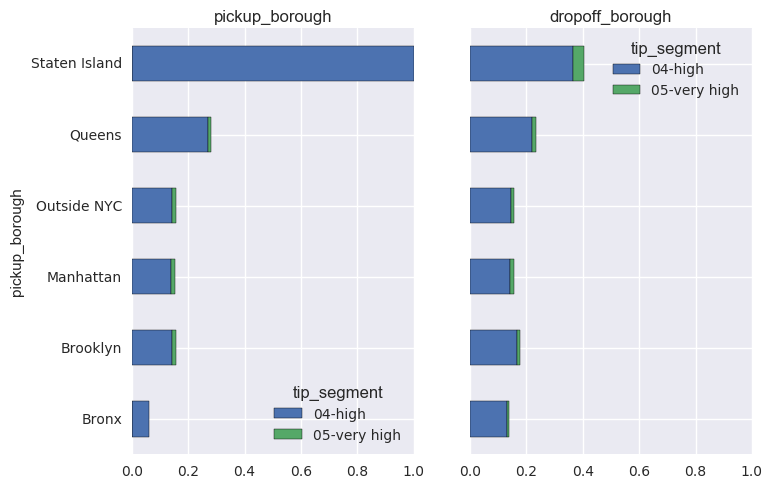

In [525]:
fig, axs = plt.subplots(1,2,sharey='all',sharex='all')

data.groupby(['pickup_borough']).tip_segment.value_counts(normalize=True).unstack()[['04-high','05-very high']].plot(kind='barh',stacked='True',ax=axs[0],title='pickup_borough')
data.groupby(['dropoff_borough']).tip_segment.value_counts(normalize=True).unstack()[['04-high','05-very high']].plot(kind='barh',stacked='True',ax=axs[1],title='dropoff_borough')

## <font color='blue'>If we look outside neighborhood, there are other factors as well that influence tip amount. Ex - if actual trip distance is much more than lat,long distance then people pay less tip

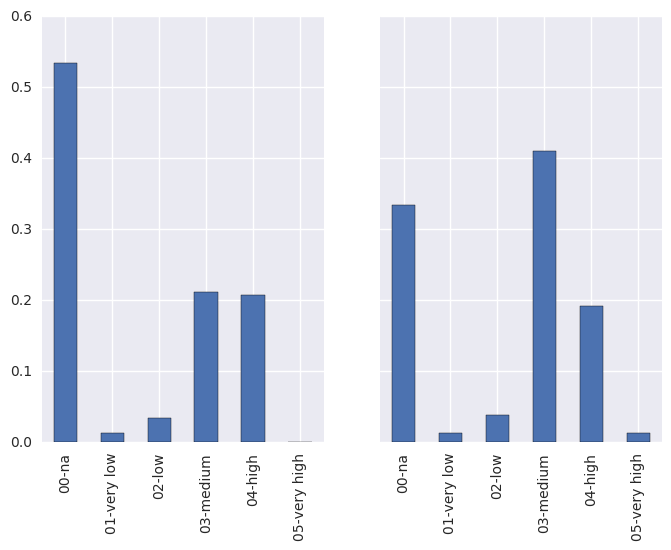

In [540]:
fig, axs = plt.subplots(1,2,sharey='all',sharex='all')

data.loc[(data.trip_distance - data.lat_long_distance)>10,'tip_segment'].value_counts(normalize=True).sort_index().plot(kind='bar',ax=axs[0])
data.loc[(data.lat_long_distance - data.trip_distance)>10,'tip_segment'].value_counts(normalize=True).sort_index().plot(kind='bar',ax=axs[1])

## <font color='blue'>As can be seen tip also varies with time of day, being slightly more at early morning and late night

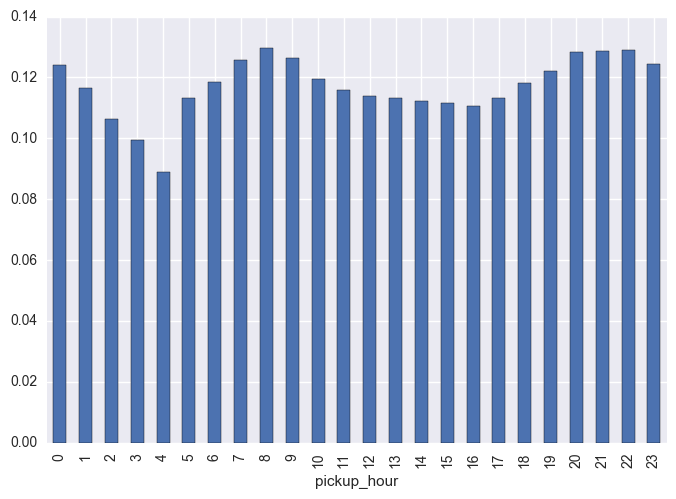

In [33]:
data.groupby('pickup_hour').tip_percent.mean().plot(kind='bar')

## So there are a lot of confounding variables, and it is difficult to isolate true effect of area on tip behaviour just based on bivariate analysis; though we get an indication that there is an impact

## Machine Learning to see the effect of all variables together

To truly evaluate the effect of area on tip behaviour, we need to see how tip changes with area when other confounding variables are constant. A machine learning model can help us isolate this effect.

We can model our problem in many different ways. Example -

1. Binary classification: To predict whether or not a tip was paid for a trip.
2. Multiclass classification: To predict the range of tip amounts paid for the trip, using the previously defined classes.
3. Regression task: To predict the amount of tip paid for a trip.

However, in this case, since we are particular interested in modelling the effect of area on high tip behaviour, so we could just mark high and very high as positive cases and rest as negative. So it will become a binary classification problem wherein we predict whether or not a high tip was paid for a trip.

In [100]:
data_M = data.copy()

In [101]:
data_M.pop('tip_amount')
data_M.pop('tip_percent')
data_M.pop('tip_paid')
data_M.pop('tpep_pickup_datetime')
data_M.pop('tpep_dropoff_datetime')

0         2015-06-03 00:06:43
1         2015-06-03 00:03:37
2         2015-06-03 00:18:00
3         2015-06-03 00:18:06
4         2015-06-03 00:18:50
5         2015-06-03 00:12:11
6         2015-06-03 00:20:07
7         2015-06-03 00:06:47
8         2015-06-03 00:05:26
9         2015-06-03 00:16:48
10        2015-06-03 00:04:24
11        2015-06-03 00:12:03
12        2015-06-03 00:03:25
13        2015-06-03 00:09:40
14        2015-06-03 00:02:09
15        2015-06-03 00:06:10
16        2015-06-03 00:02:05
17        2015-06-03 00:02:02
18        2015-06-03 00:16:50
19        2015-06-03 00:08:25
20        2015-06-03 00:04:34
21        2015-06-03 00:15:46
22        2015-06-03 00:02:44
23        2015-06-03 00:07:54
24        2015-06-03 00:09:02
25        2015-06-03 00:03:31
26        2015-06-03 00:25:40
27        2015-06-03 00:39:49
28        2015-06-03 00:23:37
29        2015-06-03 00:11:14
                 ...         
416987    2015-06-04 00:02:22
416988    2015-06-04 00:06:13
416989    

In [102]:
data_M.loc[(data_M.tip_segment == '04-high') | (data_M.tip_segment == '05-very high'),'tip_segment'] = 1
data_M.loc[~(data_M.tip_segment == 1),'tip_segment'] = 0
data_M.tip_segment.value_counts()

0    350884
1     66133
Name: tip_segment, dtype: int64

In [103]:
data_M['high_tip'] = data_M['tip_segment'].astype(int)

In [104]:
data_M.pop('tip_segment')

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        1
12        0
13        0
14        1
15        1
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        0
26        1
27        0
28        1
29        1
         ..
416987    0
416988    1
416989    0
416990    0
416991    1
416992    1
416993    0
416994    0
416995    0
416996    0
416997    1
416998    0
416999    0
417000    0
417001    0
417002    1
417003    1
417004    0
417005    1
417006    0
417007    1
417008    0
417009    0
417010    0
417011    0
417012    0
417013    0
417014    0
417015    0
417016    0
Name: tip_segment, dtype: object

In [105]:
data_M.high_tip.value_counts()

0    350884
1     66133
Name: high_tip, dtype: int64

## One hot encode categorical variables

In [35]:
def dropSomeAndOneHotEncodeSomeCatCols(df):
    df = df.copy()
    
    # split categorical and numerical features
    df_cat = df.select_dtypes(include=['object'])
    df_num = df.select_dtypes(exclude=['object'])

    # define 'low cardinality' as having no more than 25 unique values
    n_uniques = df_cat.apply(pd.Series.nunique)
    low_cardinality = n_uniques <= 25

    # keep only low-cardinality features
    df_cat = df_cat.loc[:, low_cardinality].copy()

    # record all the categories
    categories = {n: c.unique() for n, c in df_cat.iteritems()}

    # perform the one-hot encoding
    df_1hot = pd.DataFrame(index=df_cat.index)
    for feat, cats in categories.iteritems():
        for cat in cats:
            key = "{}={}".format(feat, cat)
            df_1hot[key] = (df_cat[feat] == cat).astype(float)

    # combine (one-hot encoded) categorical and numerical columns
    df = pd.concat((df_num, df_1hot), axis=1)
    
    return df

In [73]:
data_M = dropSomeAndOneHotEncodeSomeCatCols(data_M)

## Train and Test split for Model validation

In [75]:
from sklearn.cross_validation import train_test_split
trainData, testData = train_test_split(data_M, test_size = 0.2, random_state=42, stratify=data_M.high_tip)

In [76]:
trainData.shape

(333613, 40)

In [77]:
testData.shape

(83404, 40)

In [78]:
print trainData.high_tip.value_counts(normalize=True)
print testData.high_tip.value_counts(normalize=True)

0    0.841415
1    0.158585
Name: high_tip, dtype: float64
0    0.84141
1    0.15859
Name: high_tip, dtype: float64


In [79]:
X_train_M1 = trainData.drop('high_tip',axis=1)
y_train_M1 = trainData['high_tip']
X_test_M1 = testData.drop('high_tip',axis=1)
y_test_M1 = testData['high_tip']

In [80]:
print 'Train M1:\t',X_train_M1.shape, y_train_M1.shape
print 'Test M1:\t',X_test_M1.shape, y_test_M1.shape

Train M1:	(333613, 39) (333613,)
Test M1:	(83404, 39) (83404,)


## Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
randfor_M1 = RandomForestClassifier(class_weight='balanced',max_depth=10)
randfor_M1.fit(X_train_M1,y_train_M1)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
y_train_M1_pred = randfor_M1.predict(X_train_M1)
y_train_M1_pred_proba = randfor_M1.predict_proba(X_train_M1)[:,1]
train_roc_auc = roc_auc_score(y_train_M1,y_train_M1_pred_proba)
print 'train roc auc score:\t',train_roc_auc

train roc auc score:	0.89659667234


In [96]:
y_test_M1_pred = randfor_M1.predict(X_test_M1)
y_test_M1_pred_proba = randfor_M1.predict_proba(X_test_M1)[:,1]
test_roc_auc = roc_auc_score(y_test_M1,y_test_M1_pred_proba)
print 'test roc auc score:\t',test_roc_auc

test roc auc score:	0.888855569244


In [99]:
randfor_feature_imp = zip(X_train_M1.columns, randfor_M1.feature_importances_)
randfor_feature_imp = sorted(randfor_feature_imp,key=lambda x: x[1],reverse=True)
print "Top 10 features for Random Forest Model\n"
print '\n'.join(str(x) for x in randfor_feature_imp[:10])

Top 10 features for Random Forest Model

('payment_type', 0.5856570964711818)
('total_amount', 0.17105759120200414)
('fare_amount', 0.055877264169616546)
('trip_distance', 0.04031026910101413)
('trip_time', 0.035470152093489853)
('lat_long_distance', 0.02298910209761711)
('tolls_amount', 0.021427469806758269)
('VendorID', 0.017631812128304596)
('dropoff_longitude', 0.0096653894967585734)
('pickup_longitude', 0.0078058607532743036)


## <font color='blue'>I quickly built a random forest model to predict whether or not high tip will be paid for a trip. Model has a high roc auc score of 0.9.

## <font color='blue'>It turns out payment type (cash, credit) is the most important factor, followed by total amount paid, trip distance and time.

## <font color='blue'>Also dropoff & pickup longitude is in top-10, showing that area indeed has an important effect on tip behaviour

## Conclusion

If I had more time for this project, I would do the following:

- Instead of using high-level 5 boroughs for NYC, I would have used more granular 266 neighborhoods for analysis
- I would have spend more time feature engineering and exploring the data
- Especially in Machine Learning section, I would have spend more time to do:
    * k-fold cross validation instead of just train/test split
    * explore decision tree to get explicit rules around neighborhood lat, long
    * more models